<a href="https://colab.research.google.com/github/SaimM2007/RUDataScienceClub_Datathon/blob/main/SaimMeher_DataScienceClub_Datathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# install required libraries
!pip install kagglehub seaborn scikit-learn matplotlib pandas

In [26]:
# import the libraries
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

In [27]:
# download dataset from kaggle
path = kagglehub.dataset_download("vagifa/worldwide-crop-production")

Using Colab cache for faster access to the 'worldwide-crop-production' dataset.


In [28]:
# load csv file into a dataframe
crop_data = pd.read_csv(path + "/worldwide_crop_consumption.csv")

In [30]:
# filter data to keep only the rows where the measure is yield (Tonnes per hectare)
crop_data = crop_data[crop_data["MEASURE"] == "TONNE_HA"]

In [31]:
# check the availeble crops
print("avaiable crops:", crop_data["SUBJECT"].unique())

avaiable crops: ['RICE' 'WHEAT' 'MAIZE' 'SOYBEAN']


In [33]:
# group by yr and crop to get global avg yield
global_trends = crop_data.groupby(["TIME", "SUBJECT"])["Value"].mean().reset_index()

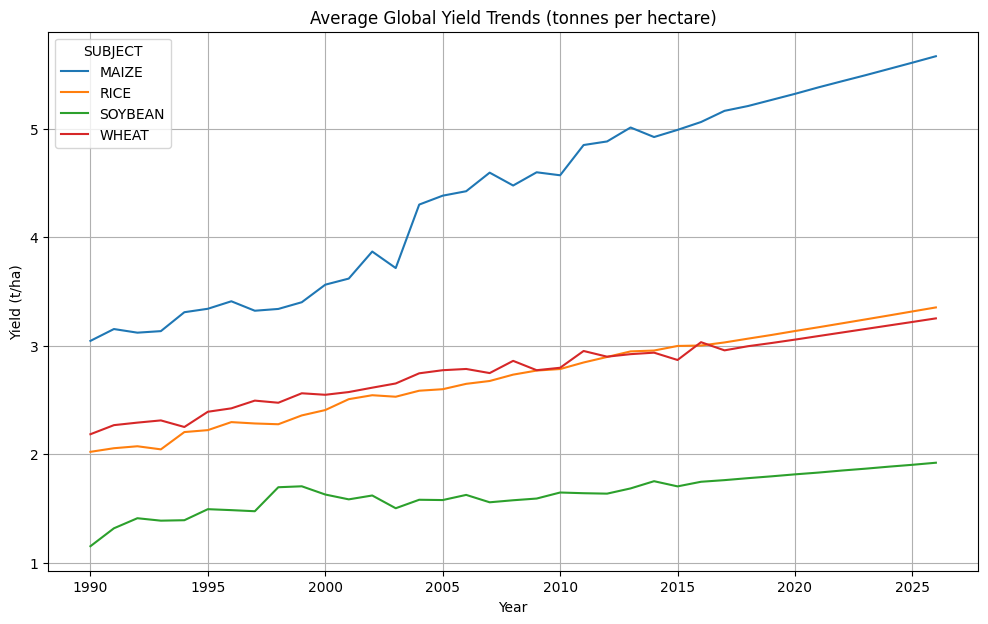

In [38]:
# plot yield trend vs time for each crop
plt.figure(figsize=(12, 7))
sns.lineplot(data=global_trends, x="TIME", y="Value", hue="SUBJECT")
plt.title("Average Global Yield Trends (tonnes per hectare)")
plt.xlabel("Year")
plt.ylabel("Yield (t/ha)")
plt.grid(True)
plt.show()

/tmp/ipython-input-2760533783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x="LOCATION", y="Value", palette="viridis")


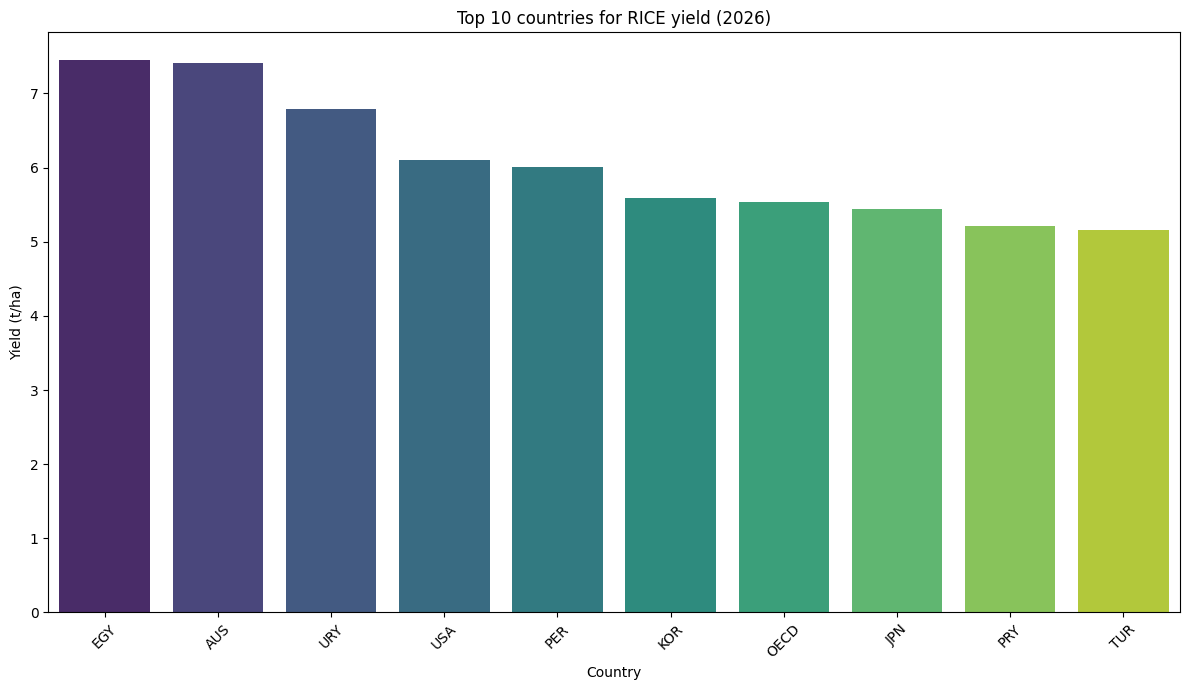

/tmp/ipython-input-2760533783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x="LOCATION", y="Value", palette="viridis")


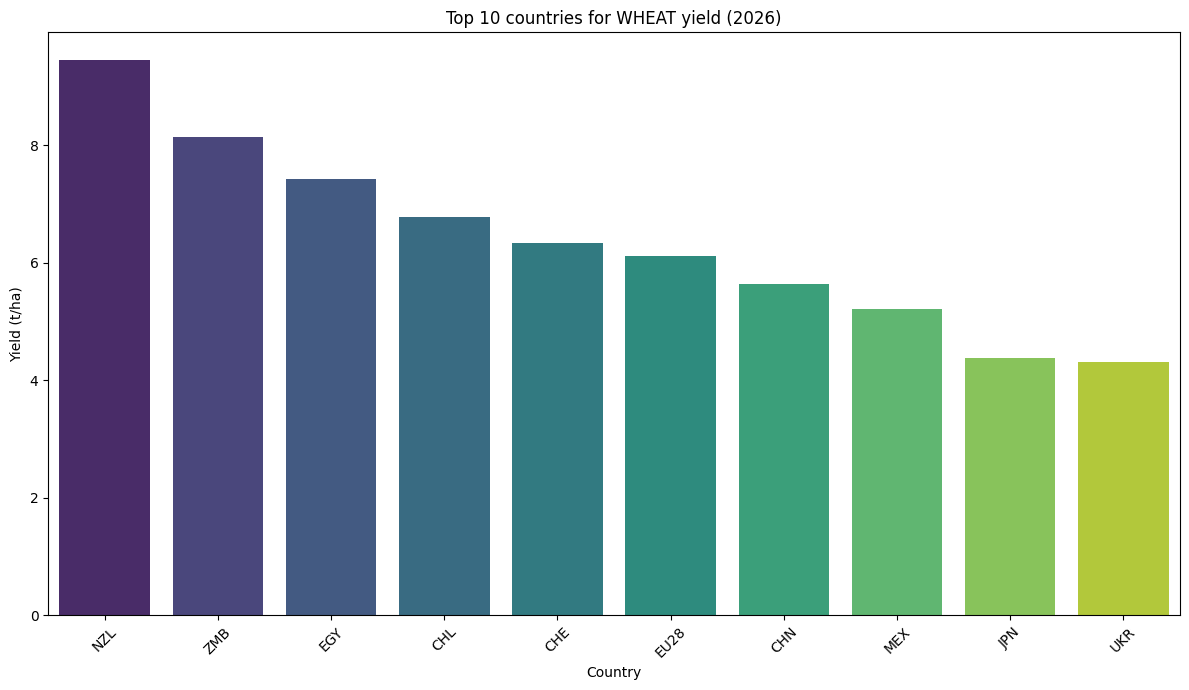

/tmp/ipython-input-2760533783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x="LOCATION", y="Value", palette="viridis")


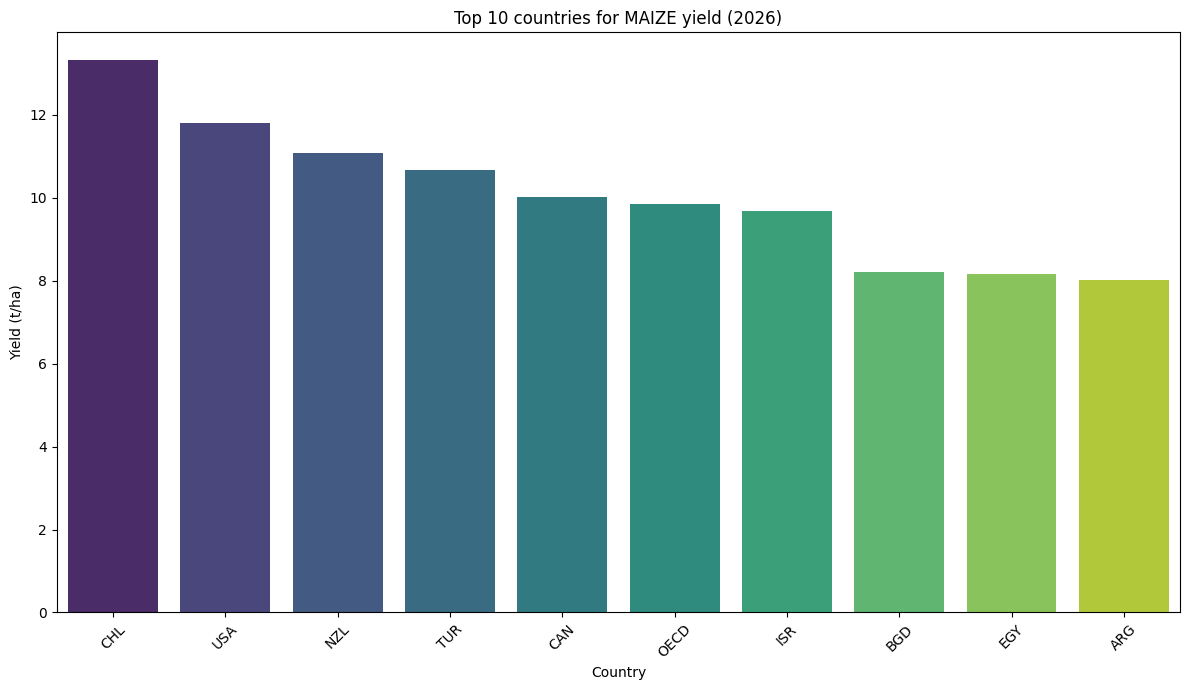

/tmp/ipython-input-2760533783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x="LOCATION", y="Value", palette="viridis")


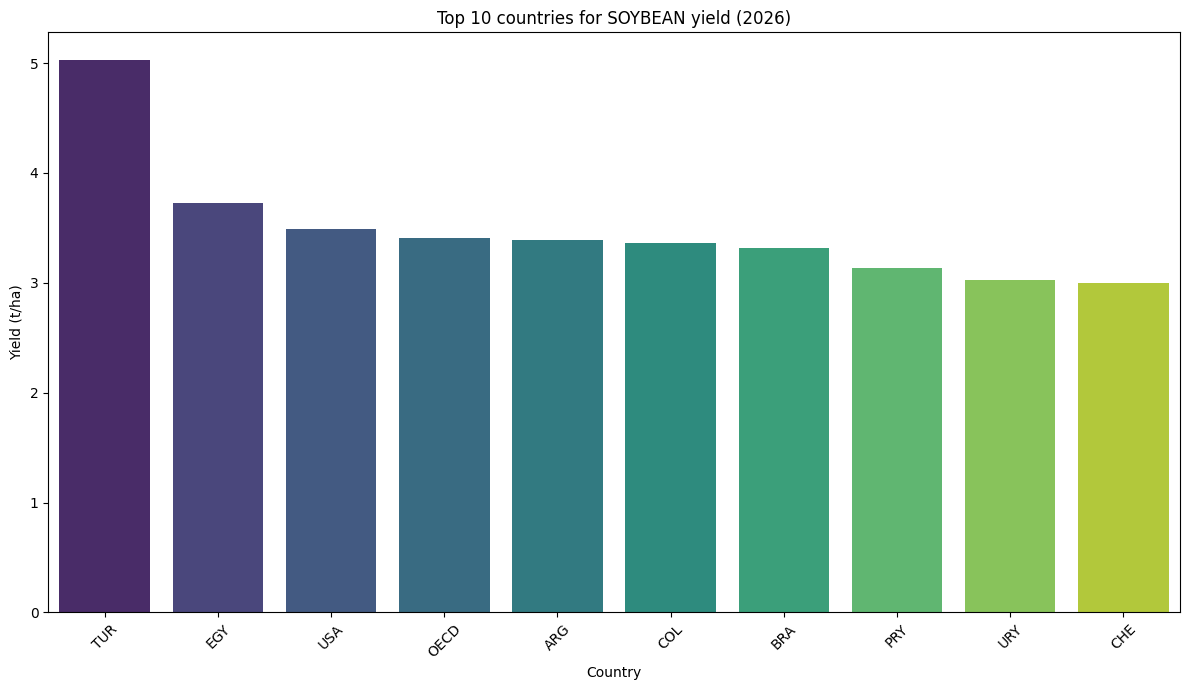

In [50]:
# get teh most recent yr in the dataset
latest_year = crop_data["TIME"].max()
latest_data = crop_data[crop_data["TIME"] == latest_year]

# plot top 10 countries for each crop in most recent yr
for crop_name in crop_data["SUBJECT"].unique():
    top_countries = (latest_data[latest_data["SUBJECT"] == crop_name].sort_values("Value", ascending=False).head(10))

    plt.figure(figsize=(12, 7))
    sns.barplot(data=top_countries, x="LOCATION", y="Value", palette="viridis")
    plt.title(f"Top 10 countries for {crop_name} yield ({latest_year})")
    plt.xlabel("Country")
    plt.ylabel("Yield (t/ha)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/

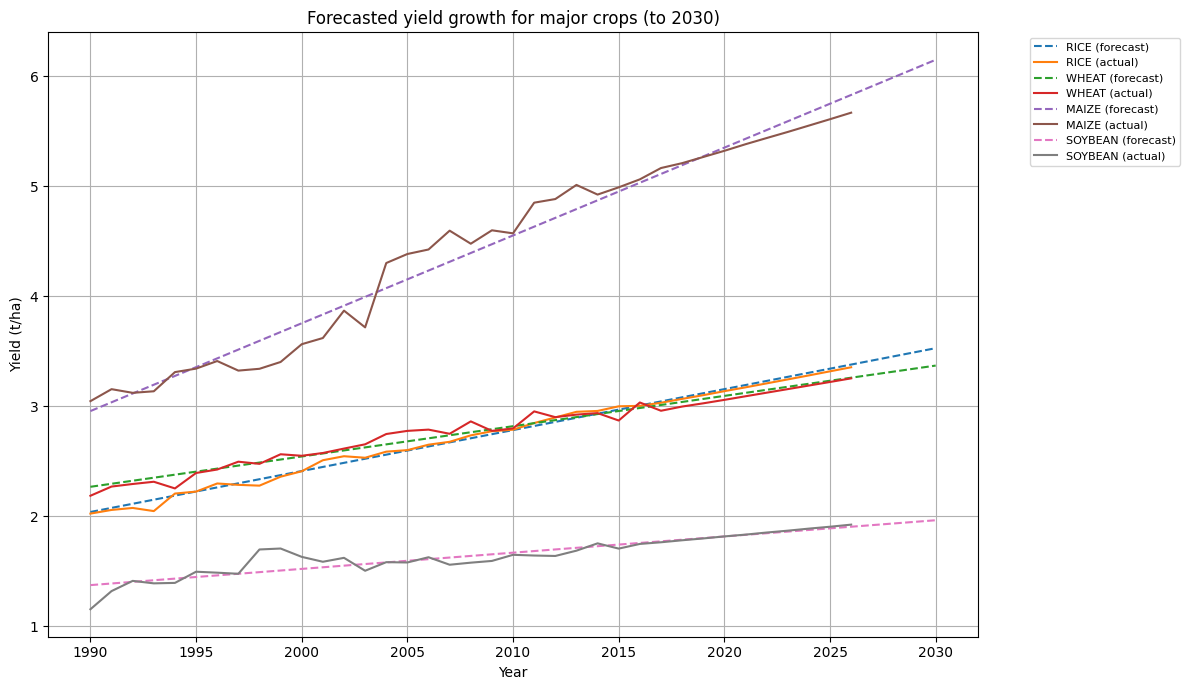

In [51]:
# forecast yield for each crop and extend the plot to 2030
forecast_results = []
plt.figure(figsize=(12, 7))

for crop_name in crop_data["SUBJECT"].unique():
    crop_subset = global_trends[global_trends["SUBJECT"] == crop_name]
    X = crop_subset[["TIME"]]
    y = crop_subset["Value"]

    model = LinearRegression().fit(X, y)

    # combine teh existing years w/ future years
    last_year = X["TIME"].max()
    future_years = np.arange(1990, 2031).reshape(-1, 1)
    preds = model.predict(future_years)

    plt.plot(future_years, preds, linestyle="--", label=f"{crop_name} (forecast)")
    plt.plot(crop_subset["TIME"], crop_subset["Value"], label=f"{crop_name} (actual)")

    # store forecasted values for display
    forecast_results.append({"Crop": crop_name, "Predicted_2025": model.predict([[2025]])[0], "Predicted_2030": model.predict([[2030]])[0]})

plt.title("Forecasted yield growth for major crops (to 2030)")
plt.xlabel("Year")
plt.ylabel("Yield (t/ha)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

In [42]:
# make dataframe w/ forecast results and show top crops by 2030
forecast_df = pd.DataFrame(forecast_results)
forecast_df = forecast_df.sort_values("Predicted_2030", ascending=False)
print("Predicted yield in 2025 and 2030 (t/ha):")
display(forecast_df.head(10))

Predicted yield in 2025 and 2030 (t/ha):


,Crop,Predicted_2025,Predicted_2030
2,MAIZE,5.749381,6.148501
0,RICE,3.341043,3.527157
1,WHEAT,3.231272,3.369001
3,SOYBEAN,1.889379,1.963084
